In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [8]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [21]:
X_train.shape,  X_test.shape, 

((700, 2), (300, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [28]:
X_test.min(), X_test.max()

(-0.014108392024525074, 1.0186515935232023)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
# Creating a model adding a dense layers

#  3 dense layers and 1 output layer

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))


model.add(Dense(1))


model.compile(optimizer='rmsprop', loss='mse')
 

In [34]:
model.fit(x=X_train, y=y_train,epochs=250,verbose=1)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 257138.4688
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 260057.1250 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255173.7812 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256908.2656 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254336.4688 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259386.7031 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257230.2500 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 248047.9062 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256531.2344 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252043.9062 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254472.0781 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251501.0156 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259523.4531 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [35]:
plot1 = pd.DataFrame(model.history.history)

<Axes: >

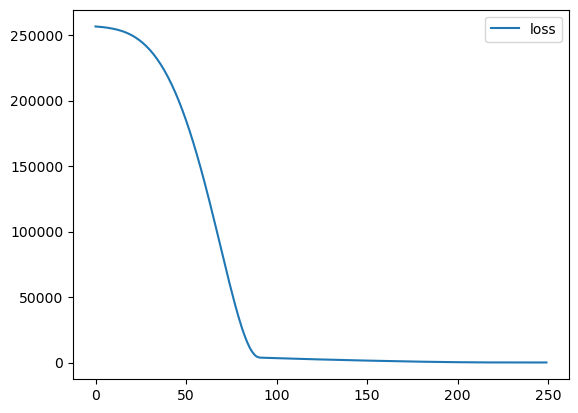

In [36]:
plot1.plot()

In [37]:
# Model Evaluation 

model.evaluate(X_test, y_test,verbose=0)

25.05313491821289

In [41]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [44]:
test_predictions.shape

test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions.shape

(300,)

In [45]:
y_test.shape

(300,)

In [59]:
actual = pd.DataFrame(y_test, columns= ['true Y'])

In [62]:
actVSpred = pd.concat([actual, test_predictions], axis =1)

In [65]:
actVSpred.head()

,true Y,0
0,402.296319,405.549011
1,624.156198,623.536133
2,582.455066,592.118408
3,578.588606,572.393372
4,371.224104,367.130707


<Axes: xlabel='true Y', ylabel='0'>

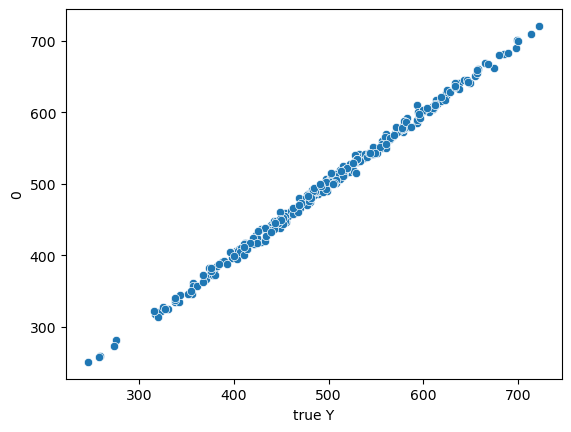

In [67]:
sns.scatterplot(data= actVSpred, x = 'true Y', y = 0)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
# on average of we are about 4 dollars off from my price point 

mean_absolute_error(actVSpred['true Y'], actVSpred[0])

4.018364336286019

In [77]:
mean_squared_error(actVSpred['true Y'], actVSpred[0])

25.05313793231802

In [78]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [79]:
# prediction on new data 

new_gem = [[998,1000]]


In [80]:
new_gem = scaler.transform(new_gem)

In [81]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[420.1222]], dtype=float32)

In [82]:
# save the model

from tensorflow.keras.models import load_model

In [84]:
model.save('my_gem_model.keras')

In [87]:
# loading the saved model

In [88]:
load_previous_model = load_model('my_gem_model.keras')

In [89]:
load_previous_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[420.1222]], dtype=float32)

# Housing price prediction using deep learning


In [91]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [92]:
# checking for any missing data

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 1000x600 with 0 Axes>

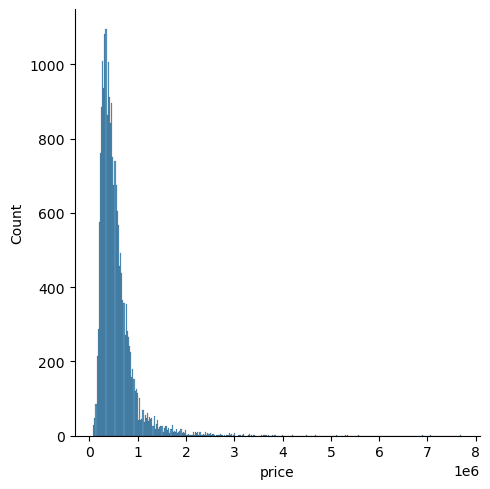

In [97]:

plt.figure(figsize=(10,6))

sns.displot(df['price'])

<Axes: xlabel='bedrooms'>

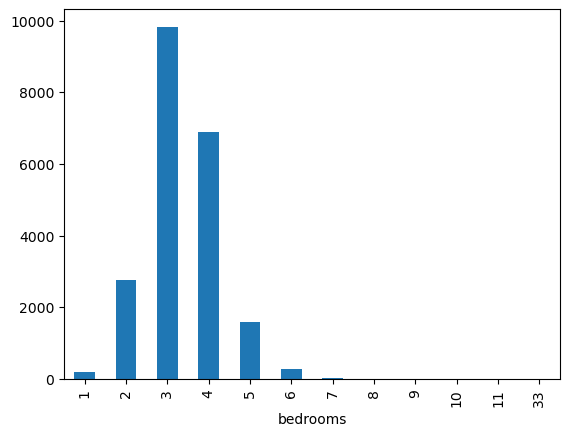

In [107]:
df['bedrooms'].value_counts().sort_index().plot.bar()

In [109]:
df['bedrooms'].value_counts().sort_index()

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [113]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

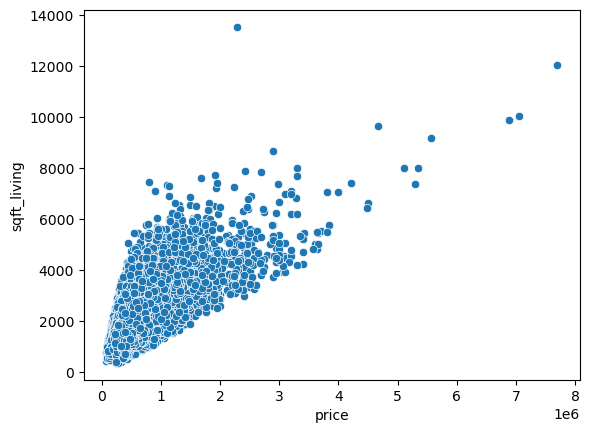

In [114]:
sns.scatterplot(data=df, x = 'price', y ='sqft_living') 

<Axes: xlabel='bedrooms', ylabel='price'>

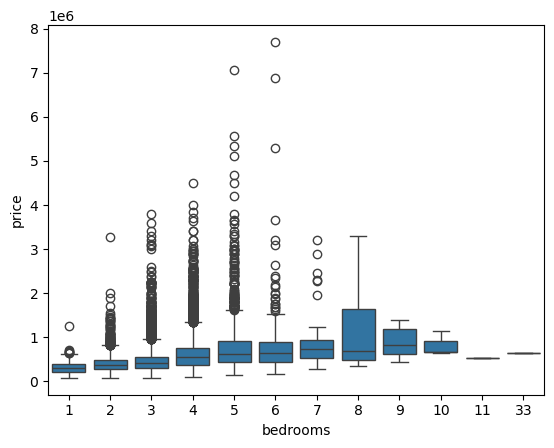

In [116]:
sns.boxplot(data=df, y= 'price', x= 'bedrooms')

In [117]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='lat'>

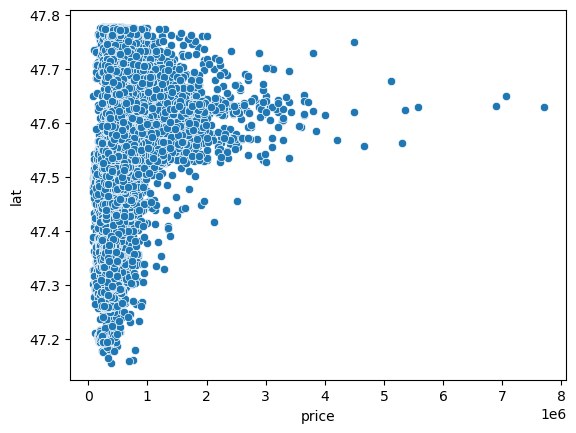

In [118]:
sns.scatterplot(data= df, x = 'price', y= 'lat')

<Axes: xlabel='price', ylabel='long'>

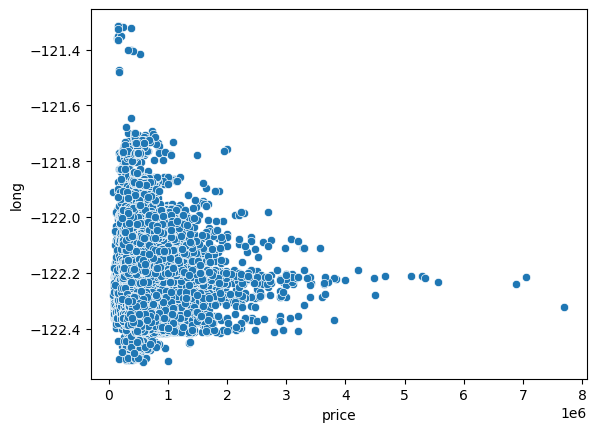

In [119]:
sns.scatterplot(data= df, x = 'price', y= 'long')

<Axes: xlabel='long', ylabel='lat'>

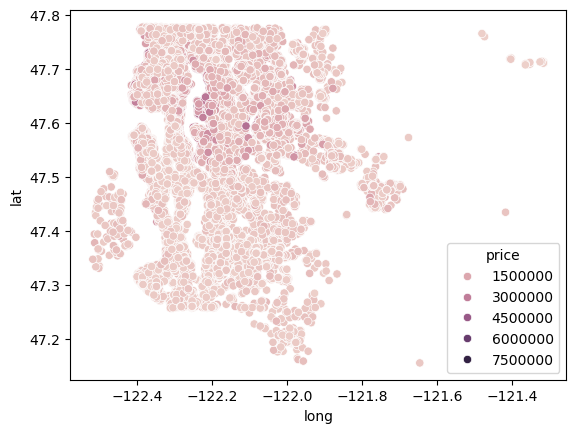

In [121]:
sns.scatterplot(data = df, y='lat', x = 'long', hue = 'price')

In [127]:
df.sort_values(by= 'price',ascending=False)[:20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [128]:
len(df)

21597

In [129]:
len(df)* 0.01

215.97

In [131]:
non_top_1_pct = df.sort_values(by= 'price',ascending=False)[216:]

<Axes: xlabel='long', ylabel='lat'>

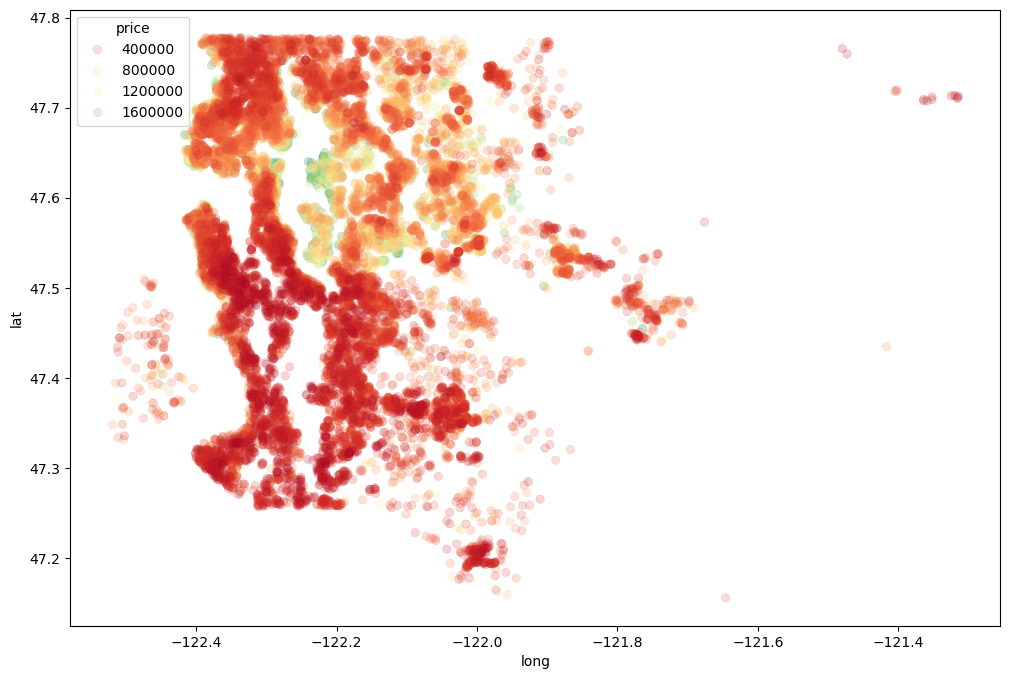

In [135]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = non_top_1_pct, y='lat', x = 'long', hue = 'price', edgecolor = None, alpha =0.2, palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

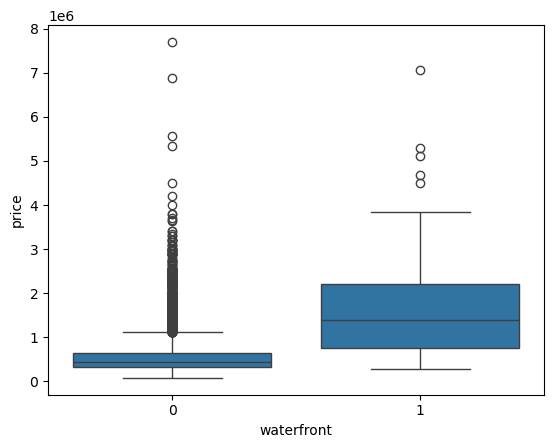

In [138]:
sns.boxplot(x='waterfront', y ='price', data = df)

In [139]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [140]:
df = df.drop('id', axis = 1)

In [141]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [144]:
df.date.dtype

dtype('O')

In [147]:
df['date'] = pd.to_datetime(df['date'])

In [148]:
df.date.dtype

dtype('<M8[ns]')

In [150]:
df['year'] = df['date'].apply(lambda x : x.year)
df['month'] = df['date'].apply(lambda x : x.month)

In [151]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [153]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: int64

<Axes: xlabel='month', ylabel='price'>

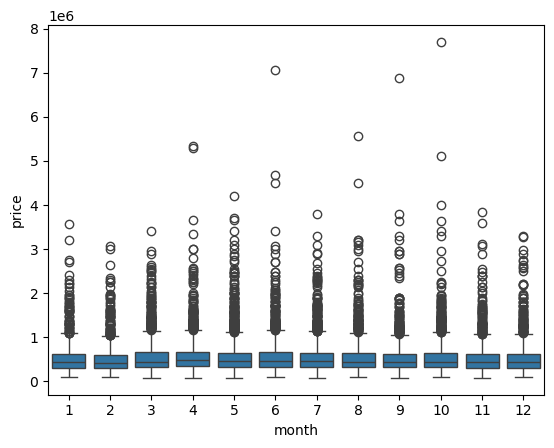

In [154]:
sns.boxplot(x ='month', y ='price', data = df)

<Axes: xlabel='month'>

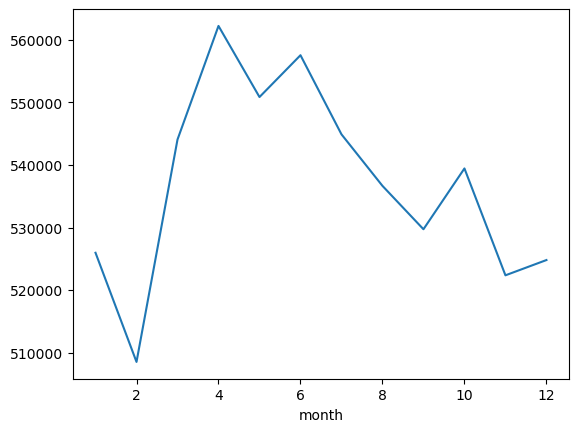

In [159]:
df.groupby('month')['price'].mean().plot()

<Axes: xlabel='year'>

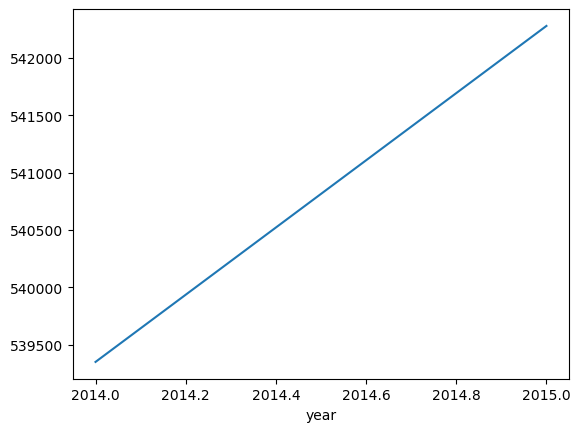

In [161]:
df.groupby('year').mean()['price'].plot()

In [162]:
df = df.drop('date', axis =1)

In [163]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [164]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [165]:
df = df.drop('zipcode', axis =1 )

In [166]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [167]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [168]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [169]:
X = df.drop('price', axis = 1 ).values
y = df['price'].values

In [170]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [171]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [174]:
scaler = MinMaxScaler()

In [175]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
X.shape

(21597, 19)

In [177]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))


model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [178]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=128, epochs=400)


Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 450620784640.0000 - val_loss: 418961948672.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 433903140864.0000 - val_loss: 418367537152.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 419635888128.0000 - val_loss: 415079923712.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 411883536384.0000 - val_loss: 405329281024.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 406381395968.0000 - val_loss: 384868122624.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 381040558080.0000 - val_loss: 350394351616.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 356584718336.0000 - val_loss: 301561085952.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 297002663936.0000 - val_loss: 243599212544.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 229899255808.0000 - val_loss: 184783224832.0000
Epoch 10/400
119/11

In [179]:
# for checking the losses 

losses = pd.DataFrame(model.history.history)

<Axes: >

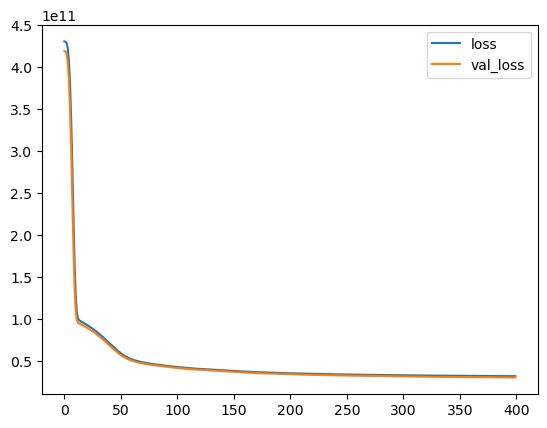

In [180]:
losses.plot()

In [181]:
from sklearn.metrics import explained_variance_score

In [183]:
predictions  = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [184]:
mean_absolute_error(y_test, predictions)

# we are off by 100 thousand dollars

106251.31938476562

In [185]:
mean_squared_error(y_test, predictions)

30170734724.508747

In [186]:
# rmse 
np.sqrt(mean_squared_error(y_test, predictions))

173697.2501927096

In [187]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [188]:
5.402966e+05

540296.6

In [189]:
# not great mean absolute error

In [190]:
explained_variance_score(y_test, predictions)

0.7725280031725292

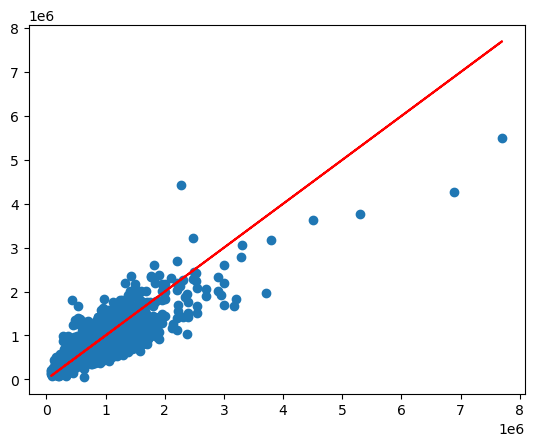

In [194]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test,'r')

# Preditions on new houses 

In [199]:
single_df  = df.drop('price',axis=1).iloc[0]

In [207]:
single_df.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [208]:
single_df = scaler.transform(single_df.values.reshape(-1,19))

In [209]:
model.predict(single_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[288301.62]], dtype=float32)

In [210]:
df.price[0]

221900.0

In [211]:
# we are over shooting here 

# deeplearning with tensor flow classfication problem 

In [212]:
df2 = pd.read_csv('cancer_classification.csv')
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [213]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [215]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

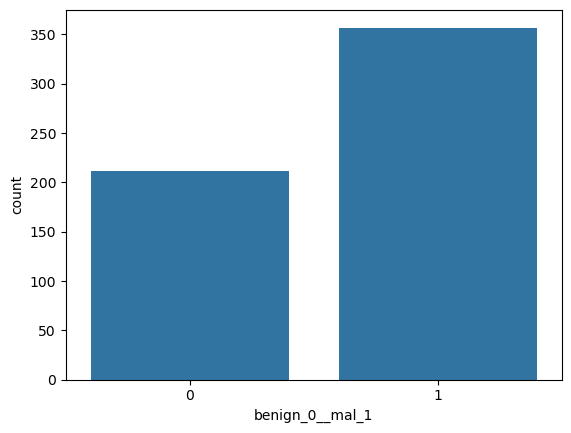

In [216]:
sns.countplot(x='benign_0__mal_1', data=df2)

In [223]:
df2.corr(numeric_only=True)['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

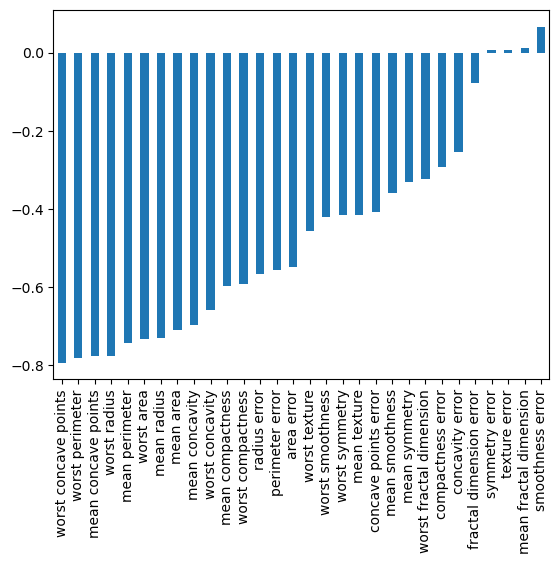

In [225]:
df2.corr(numeric_only=True)['benign_0__mal_1'][:-1].sort_values().plot.bar()

<Axes: >

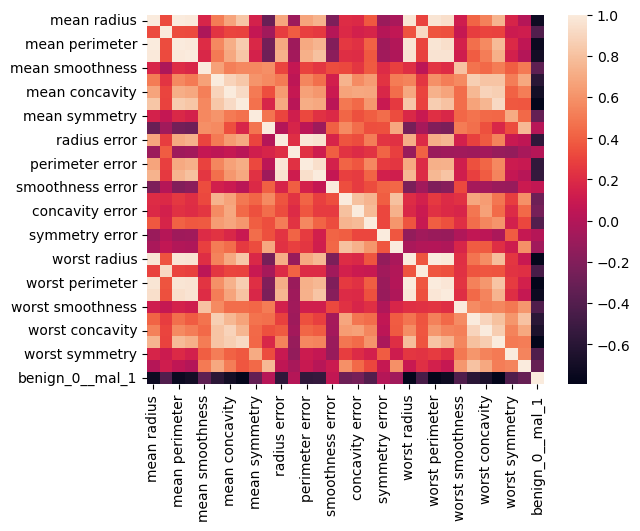

In [229]:
sns.heatmap(df2.corr(numeric_only=True))

In [233]:
# Train Test Split

X = df2.drop('benign_0__mal_1', axis =1).values
y= df2.benign_0__mal_1.values

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [237]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [240]:
len(df2.columns)

31

In [241]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))


# Binary Classfication
model.add(Dense(1,activation= 'sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy')
          

In [242]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.6681 - val_loss: 0.6296
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6175 - val_loss: 0.5938
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5792 - val_loss: 0.5540
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5404 - val_loss: 0.5109
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4966 - val_loss: 0.4633
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4572 - val_loss: 0.4163
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4061 - val_loss: 0.3683
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3685 - val_loss: 0.3242
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3274 - val_loss: 0.2881
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2811 - val_loss: 0.2546
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2571 - val_loss: 0.2314
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

In [245]:
losses1  = pd.DataFrame(model.history.history)

In [246]:
losses1

,loss,val_loss
0,0.655604,0.629625
1,0.610753,0.593831
2,0.573467,0.554017
3,0.531833,0.510924
4,0.490312,0.463285
...,...,...
595,0.003857,0.116829
596,0.003893,0.125424
597,0.004215,0.117509
598,0.005110,0.104111


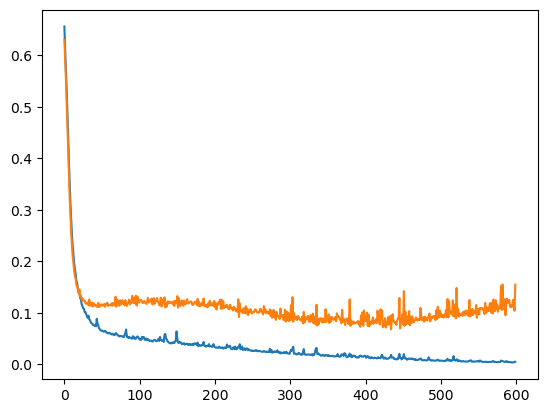

In [247]:
plt.plot(losses1)

In [244]:
# We again have to retain the model coz our training data is still going down while our validdaton data is increaing 
# which means we are over fitting the data 
# We should implement the early stop mechanism so that our we wont over fit the data.

### Retraining the model again  with early stop mechanism


In [262]:
# Model 2 

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))


# Binary Classfication
model.add(Dense(1,activation= 'sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy')
          

In [263]:
from tensorflow.keras.callbacks import EarlyStopping

In [264]:
early_stop = EarlyStopping(monitor= 'val_loss', mode= 'min', verbose=1, patience=25)

In [265]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks= [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.7438 - val_loss: 0.6904
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6803 - val_loss: 0.6497
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6394 - val_loss: 0.6180
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6104 - val_loss: 0.5860
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5793 - val_loss: 0.5462
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5502 - val_loss: 0.5027
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4844 - val_loss: 0.4453
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4547 - val_loss: 0.3939
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3960 - val_loss: 0.3469
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3516 - val_loss: 0.3105
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3189 - val_loss: 0.2753
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 

In [266]:
losses2 = pd.DataFrame(model.history.history)

In [267]:
losses2

,loss,val_loss
0,0.726779,0.690389
1,0.671860,0.649720
2,0.636119,0.618046
3,0.605354,0.585955
4,0.569406,0.546159
...,...,...
73,0.051558,0.107555
74,0.053552,0.099652
75,0.051025,0.107286
76,0.050925,0.101509


<Axes: >

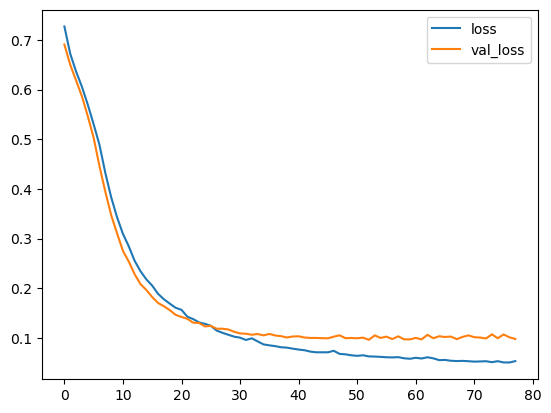

In [268]:
losses2.plot()

### Third thing we can do to prevent overfitting is to add drop out layers 

In [269]:
from tensorflow.keras.layers import Dropout

In [270]:
# Model 3
# when we add drop out layer 0.5 means half of these neurons will be turned off randomly.
# what it means each neuron has a 50 percent probability of being turned off during each batch.

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


# Binary Classfication
model.add(Dense(1,activation= 'sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy')

In [271]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks= [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.7017 - val_loss: 0.6776
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7084 - val_loss: 0.6663
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6653 - val_loss: 0.6544
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6602 - val_loss: 0.6359
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6429 - val_loss: 0.6154
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6227 - val_loss: 0.5914
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6176 - val_loss: 0.5666
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5776 - val_loss: 0.5403
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5662 - val_loss: 0.5108
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5305 - val_loss: 0.4803
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5197 - val_loss: 0.4447
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

In [272]:
losses4 = pd.DataFrame(model.history.history)

<Axes: >

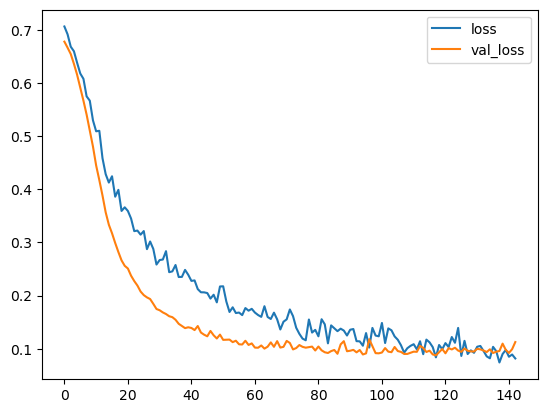

In [273]:
losses4.plot()

In [280]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [285]:
predictions =np.where(predictions >= 0.5 ,1 ,0)

In [282]:
9.93008614e-01


0.993008614

In [276]:
from sklearn.metrics import classification_report, confusion_matrix

In [286]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [287]:
confusion_matrix(y_test, predictions)

array([[54,  1],
       [ 3, 85]], dtype=int64)

# lets predict for some data 

In [310]:
one_data = df2.iloc[1][:-1]

In [311]:
X.shape

(569, 30)

In [312]:
one_data.shape

(30,)

In [313]:
one_data.values

array([  20.57    ,   17.77    ,  132.9     , 1326.      ,    0.08474 ,
          0.07864 ,    0.0869  ,    0.07017 ,    0.1812  ,    0.05667 ,
          0.5435  ,    0.7339  ,    3.398   ,   74.08    ,    0.005225,
          0.01308 ,    0.0186  ,    0.0134  ,    0.01389 ,    0.003532,
         24.99    ,   23.41    ,  158.8     , 1956.      ,    0.1238  ,
          0.1866  ,    0.2416  ,    0.186   ,    0.275   ,    0.08902 ])

In [314]:
one_data.values.reshape(1,30)

array([[  20.57    ,   17.77    ,  132.9     , 1326.      ,    0.08474 ,
           0.07864 ,    0.0869  ,    0.07017 ,    0.1812  ,    0.05667 ,
           0.5435  ,    0.7339  ,    3.398   ,   74.08    ,    0.005225,
           0.01308 ,    0.0186  ,    0.0134  ,    0.01389 ,    0.003532,
          24.99    ,   23.41    ,  158.8     , 1956.      ,    0.1238  ,
           0.1866  ,    0.2416  ,    0.186   ,    0.275   ,    0.08902 ]])

In [315]:
one_data= scaler.transform(one_data.values.reshape(1,30))

In [316]:
score = model.predict(one_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [317]:
np.set_printoptions(suppress= True)

In [318]:
score

array([[0.00042526]], dtype=float32)

In [319]:
df2.iloc[1]

mean radius                  20.570000
mean texture                 17.770000
mean perimeter              132.900000
mean area                  1326.000000
mean smoothness               0.084740
mean compactness              0.078640
mean concavity                0.086900
mean concave points           0.070170
mean symmetry                 0.181200
mean fractal dimension        0.056670
radius error                  0.543500
texture error                 0.733900
perimeter error               3.398000
area error                   74.080000
smoothness error              0.005225
compactness error             0.013080
concavity error               0.018600
concave points error          0.013400
symmetry error                0.013890
fractal dimension error       0.003532
worst radius                 24.990000
worst texture                23.410000
worst perimeter             158.800000
worst area                 1956.000000
worst smoothness              0.123800
worst compactness        